# Efficient Frontier Part 2

In [22]:
%load_ext autoreload
%autoreload 2

import edhec_risk_kit as erk

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [23]:
ind = erk.get_ind_returns()
er = erk.annualize_rets(ind.loc["1996":"2000"], 12)
cov = ind.loc["1996":"2000"].cov()

c:\Users\shantala.mukherjee\OneDrive - Invartis Consulting\Python\edhec_risk_kit.py:59: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  ind = pd.read_csv("ind30_m_rets.csv",


In [24]:
def portfolio_return(weights, returns):
    """
    Takes a vector of asset weights, and a vector of asset returns, calculates the overall portfolio return
    """
    return weights.T @ returns

def portfolio_vol(weights, covmat):
    """
    Takes a vector of asset weights, and a covariance matrix of the assets, calculates the overall portfolio std dev
    """
    return (weights.T @ covmat @ weights)**0.5


In [25]:
l = ["Food", "Beer", "Smoke", "Coal"] # list of sectors (ie assets)
er[l] # expected return for these four assets

Food     0.115523
Beer     0.140934
Smoke    0.108347
Coal     0.415439
dtype: float64

In [26]:
cov.loc[l,l] #selecting the sub-matrix of the covariance matrix filtered by this list of assets

,Food,Beer,Smoke,Coal
Food,0.002628,0.002400,0.002023,0.000083
Beer,0.002400,0.005279,0.001359,0.001733
Smoke,0.002023,0.001359,0.008432,-0.000768
Coal,0.000083,0.001733,-0.000768,0.018692


Move the above two portfolio functions into the erk module. Once that is done, we will test the functions below

In [27]:
import numpy as np
weights = np.repeat(1/4, 4) #since there are four assets in list l, we will weigh them equally at 1/4 each
weights

array([0.25, 0.25, 0.25, 0.25])

In [28]:
erk.portfolio_return(weights, er[l])

0.19506078791327836

In [29]:
erk.portfolio_vol(weights, cov.loc[l,l])

0.055165429488939474

## 2 Asset Frontier

In [30]:
l = ["Games", "Fin"]

In [31]:
# we will specify the number of points on the efficient frontier
n_points = 20
weights = [np.array([w,1-w]) for w in np.linspace(0,1,n_points)]   # 2-asset portfolio , if one asset has weight w, the other will have weight 1-w. Weights w are equally spaced 20 points between 0 and 1

In [32]:
weights

[array([0., 1.]),
 array([0.05263158, 0.94736842]),
 array([0.10526316, 0.89473684]),
 array([0.15789474, 0.84210526]),
 array([0.21052632, 0.78947368]),
 array([0.26315789, 0.73684211]),
 array([0.31578947, 0.68421053]),
 array([0.36842105, 0.63157895]),
 array([0.42105263, 0.57894737]),
 array([0.47368421, 0.52631579]),
 array([0.52631579, 0.47368421]),
 array([0.57894737, 0.42105263]),
 array([0.63157895, 0.36842105]),
 array([0.68421053, 0.31578947]),
 array([0.73684211, 0.26315789]),
 array([0.78947368, 0.21052632]),
 array([0.84210526, 0.15789474]),
 array([0.89473684, 0.10526316]),
 array([0.94736842, 0.05263158]),
 array([1., 0.])]

Now we just need to calculate the return and volatility corresponding to each of these weights, and then we can plot the efficient frontier

In [33]:
l

['Games', 'Fin']

<Axes: xlabel='Vol', ylabel='R'>

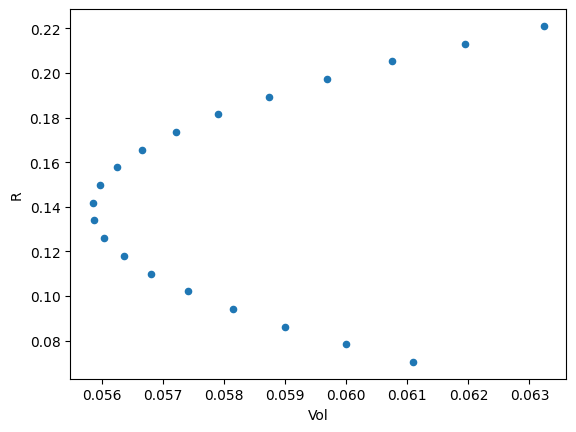

In [34]:
rets1 = [erk.portfolio_return(w, er[l]) for w in weights]
vols1 = [erk.portfolio_vol(w, cov.loc[l,l]) for w in weights]
import pandas as pd
ef = pd.DataFrame({"R": rets1, "Vol": vols1}) # creating a dataframe with the return and vol of each portfolio
ef.plot.scatter(x="Vol",y="R")

We have the plot of the efficient frontier above. We will add the calculations we just did to our module erk in the form of custom functions

<Axes: xlabel='Volatility'>

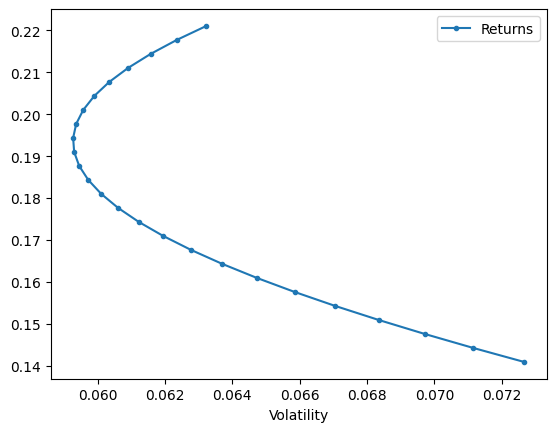

In [36]:
l = ["Fin", "Beer"]
erk.plot_ef2(25, er[l], cov.loc[l,l])

Now we will modify the plot_ef2 function in erk by adding styling to the chart function

<Axes: xlabel='Volatility'>

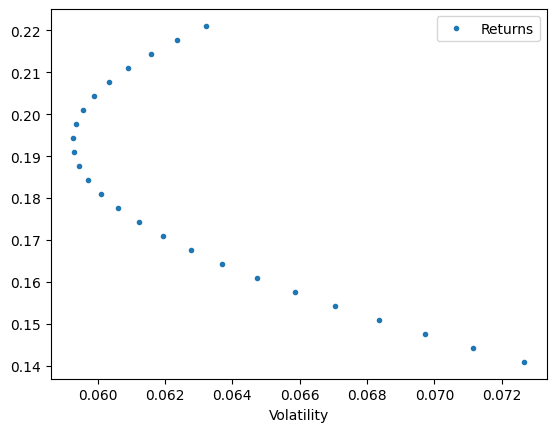

In [38]:
erk.plot_ef2(25, er[l], cov.loc[l,l], style = ".")